In [1]:
import numpy as np
import matplotlib.pyplot as plt
import toolscosmo as tcm
import tools21cm as t2c

/Users/sgiri/miniforge3/envs/cosmo_env/lib/python3.10/site-packages/toolscosmo/num_sim_data.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import os, pickle, pkg_resources


To use, extreme value statistics (EVS), install evstats package found at https://github.com/christopherlovell/evstats


In [2]:
grid_size = 256 #512 #128 #
box_size  = 500 #Mpc/h 
param = tcm.par()
param.file.ps = 'CAMB' # 'CLASS' 'CLASSemu'
param.file.ps = tcm.get_Plin(param)
iSeed = 314159265

Using CAMB to estimate linear power spectrum.
sigma_8=0.811
CAMB runtime: 0.18 s


In [3]:
z1 = 149.
z2 = 7.

delta_lin = tcm.generate_gaussian_random_field(grid_size, box_size, param=param, random_seed=iSeed)['delta_lin']
# particle_pos_z1 = tcm.generate_initial_condition_positions(grid_size, box_size, z1, param, LPT=2, delta_lin=delta_lin)['positions']
particle_pos_z1 = tcm.generate_initial_condition_positions(grid_size, box_size, z2, param, LPT=1, delta_lin=delta_lin)['positions']
particle_pos_z2 = tcm.generate_initial_condition_positions(grid_size, box_size, z2, param, LPT=2, delta_lin=delta_lin)['positions']

MAS = 'PCS'
delta_z1 = tcm.particles_on_grid(particle_pos_z1, grid_size, box_size, MAS=MAS)
delta_z2 = tcm.particles_on_grid(particle_pos_z2, grid_size, box_size, MAS=MAS)

Generating Gaussian random field...
...done in 0.976 seconds
Preparing cosmological solvers...
astropy will be used.
...done
Displacing particles using 1LPT...
...done in 11.229 seconds
Displacing particles using 2LPT...
...done in 60.145 seconds

Using PCS mass assignment scheme
Time taken = 0.502 seconds


Using PCS mass assignment scheme
Time taken = 0.479 seconds



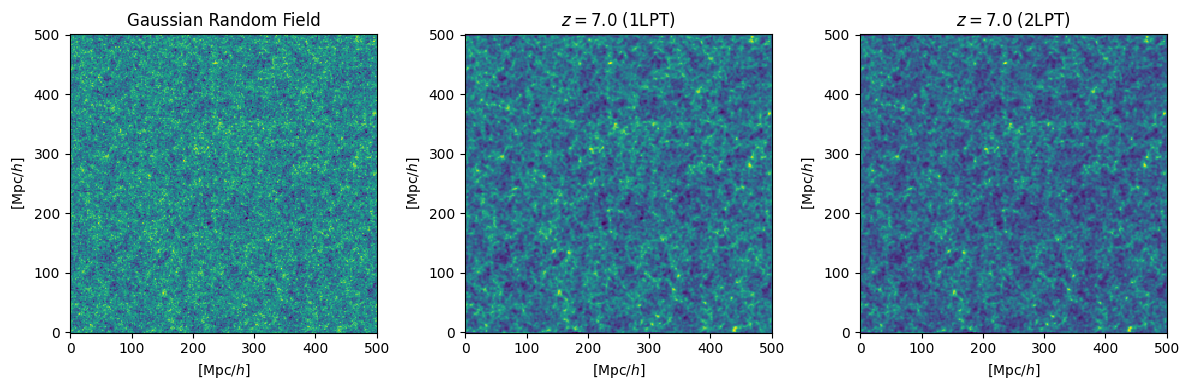

In [4]:
# fig, axs = plt.subplots(1,3,figsize=(12,4))
# axs[0].set_title('Gaussian Random Field')
# xx = np.linspace(0,box_size,grid_size)
# axs[0].pcolor(xx, xx, delta_lin[:,:,grid_size//2])
# xx = np.linspace(0,box_size,grid_size)
# axs[1].set_title(f'$z={z1}$')
# axs[1].pcolor(xx, xx, delta_z1[:,:,grid_size//2])
# axs[2].set_title(f'$z={z2}$')
# axs[2].pcolor(xx, xx, delta_z2[:,:,grid_size//2])
# for ax in axs.flatten():
#     ax.set_xlabel('[Mpc/$h$]')
#     ax.set_ylabel('[Mpc/$h$]')
# plt.tight_layout()
# plt.show()

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].set_title('Gaussian Random Field')
xx = np.linspace(0,box_size,grid_size)
axs[0].pcolor(xx, xx, delta_lin[:,:,grid_size//2])
xx = np.linspace(0,box_size,grid_size)
axs[1].set_title(f'$z={z2}$ (1LPT)')
axs[1].pcolor(xx, xx, delta_z1[:,:,grid_size//2])
axs[2].set_title(f'$z={z2}$ (2LPT)')
axs[2].pcolor(xx, xx, delta_z2[:,:,grid_size//2])
for ax in axs.flatten():
    ax.set_xlabel('[Mpc/$h$]')
    ax.set_ylabel('[Mpc/$h$]')
plt.tight_layout()
plt.show()

In [10]:
# ps0 = t2c.power_spectrum_1d(delta_lin, kbins=20, box_dims=box_size)
# ps1 = t2c.power_spectrum_1d(delta_z1, kbins=20, box_dims=box_size)
# ps2 = t2c.power_spectrum_1d(delta_z2, kbins=20, box_dims=box_size)
# k0, p0 = ps0[1], ps0[0]
# k1, p1 = ps1[1], ps1[0]#/tcm.growth_factor(z2, param)**2
# k2, p2 = ps2[1], ps2[0]#/tcm.growth_factor(z2, param)**2

# fig, ax = plt.subplots(1,1,figsize=(5,4))
# kk, pp = param.file.ps['k'], param.file.ps['P']
# ax.loglog(kk, pp, c='k', ls='-', label='$P_\mathrm{{lin}}$')
# ax.loglog(k0, p0, c='r', ls='--', label='$P^{{grid}}_\mathrm{{lin}}$')
# ax.loglog(k1, p1, c='C0', ls='-.', label=f'$z={z1}$')
# ax.loglog(k2, p2, c='C1', ls=':', label=f'$z={z2}$')
# ax.set_xlabel('[$h$/Mpc]')
# ax.set_ylabel('$P(k)$')
# ax.axis([8e-3,3,3,4e4])
# ax.legend()
# plt.tight_layout()
# plt.show()